# **Deep Learning with CNNs**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join
import re
from sklearn.model_selection import train_test_split
from shutil import copy2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda

# Prepare data for CNNs
def prepareImage(dir='./pokemon/pokemon_jpg'):
    # Set true label for each image
    pokemons = pd.read_csv('./pokemon/pokemon-images-and-types/pokemon.csv')
    numbers = []
    for i in range(1, pokemons.shape[0] + 1):
        numbers.append(i)
    pokemons['pkn'] = numbers
    IMG_DIR = dir
    onlyfiles = [f for f in listdir(IMG_DIR) if isfile(join(IMG_DIR, f))]
    dataframe_img = pd.DataFrame([])
    images = []
    pokemon_number = []
    for img in onlyfiles:
        if not re.search('-', img):
            pkn = img.split('.')
            n = re.sub("[^0-9]", "", pkn[0])
            path = IMG_DIR + '/' + str(img)
            images.append(path)
            pokemon_number.append(n)
    dataframe_img['images'] = images
    dataframe_img['pkn'] = pokemon_number
    dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
    dataframe_img['pkn'] = dataframe_img['pkn'].astype(int)
    result = pokemons.merge(dataframe_img, left_on='pkn', right_on='pkn')

    # Number of images in each classes plot
    select = list(set(result['Type1']))
    result = result[result['Type1'].isin(select)]
    counts = {}
    for i in range(len(select)):
        counts[result['Type1'].value_counts().index[i]] = result['Type1'].value_counts()[i]

    # Plotting number of images in each class
    fig = plt.figure(figsize=(15, 5))
    sns.barplot(x=list(counts.keys()), y=list(counts.values())).set_title('Number of images in each class')
    plt.margins(x=0)
    plt.show()

    # Select top five largest classes
    select.clear()
    for i in range(5):
        select.append(result['Type1'].value_counts().index[i])
    result = result[result['Type1'].isin(select)]

    # Split data into train, test and validation sets
    os.mkdir('train/')
    os.mkdir('test/')
    os.mkdir('val/')
    for class_ in result['Type1'].unique():
        os.mkdir('train/' + str(class_) + '/')
        os.mkdir('test/' + str(class_) + '/')
        os.mkdir('val/' + str(class_) + '/')

    X_train, X_test, y_train, y_test = train_test_split(
        result, result['Type1'], test_size=0.33, stratify=result['Type1'], shuffle=True)

    X_test, X_val, y_test, y_val = train_test_split(
        X_test, y_test, test_size=0.33, stratify=y_test, shuffle=True)

    for image, type_ in zip(X_train['images'], y_train):
        copy2(image, 'train/' + type_)

    for image, type_ in zip(X_test['images'], y_test):
        copy2(image, 'test/' + type_)

    for image, type_ in zip(X_val['images'], y_val):
        copy2(image, 'val/' + type_)

    # Data augmentation using ImageDataGenerator
    datagen = ImageDataGenerator(rotation_range=45,  # Degree range for random rotations
                   zoom_range=0.2,  # Range for random zoom
                   horizontal_flip=True,  # Randomly flip inputs horizontally
                   width_shift_range=0.15,  # Range for horizontal shift
                   height_shift_range=0.15,  # Range for vertical shift
                   shear_range=0.2)  # Shear Intensity
    train = datagen.flow_from_directory('train/')
    test = datagen.flow_from_directory('test/')
    val = datagen.flow_from_directory('val/')
    return train, test, val, result

### PART A - DEEP LEARNING MODEL (40 POINTS)

In [ ]:
def buildCNN():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu',
                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()
    return model

In [ ]:
def plotData(history):
    fig = plt.figure(figsize=(17, 4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.legend()
    plt.grid()
    plt.title(f'accuracy')

    plt.subplot(122)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid()
    plt.title(f'loss')
    plt.show()

In [ ]:
# Data for experiments
train, test, val, _ = prepareImage()

In [ ]:
model = buildCNN()
history = model.fit(train, epochs=30, validation_data=test)
plotData(history)

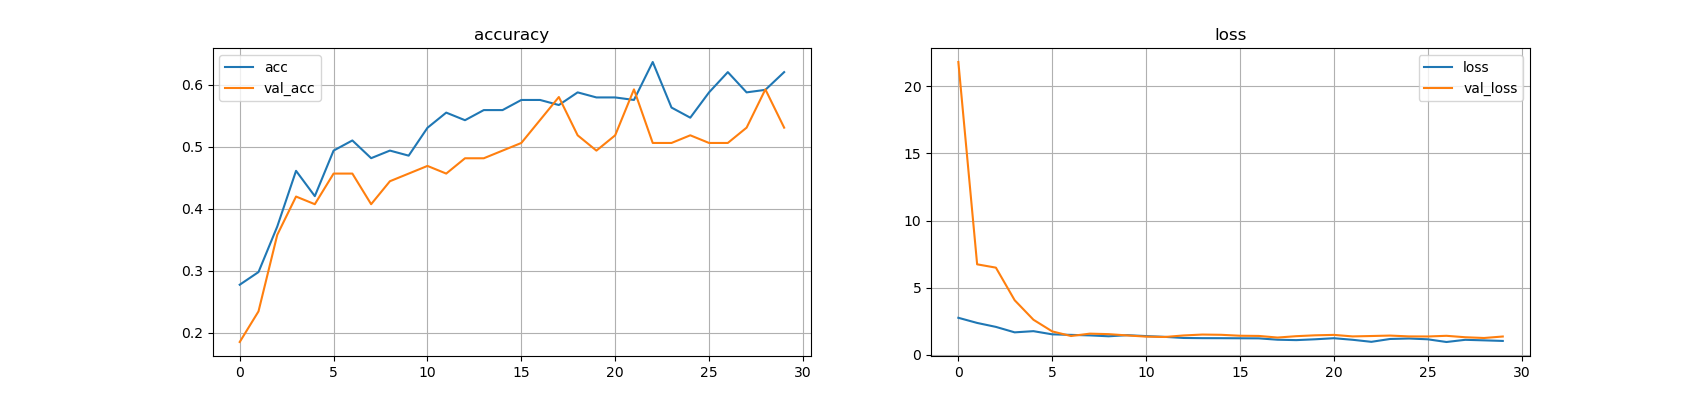

As shown above, the best accuracy of val is **60%** at 21th epoch and network plateaus at around **15th** epoch.

### PART B - ACTIVATION FUNCTION (10 POINTS)
Change activation function from **ReLU** to **sigmoid**.

In [ ]:
def buildCNN1():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='sigmoid',
                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()
    return model

In [ ]:
model1 = buildCNN1()
history1 = model1.fit(train, epochs=30, validation_data=test)
plotData(history1)

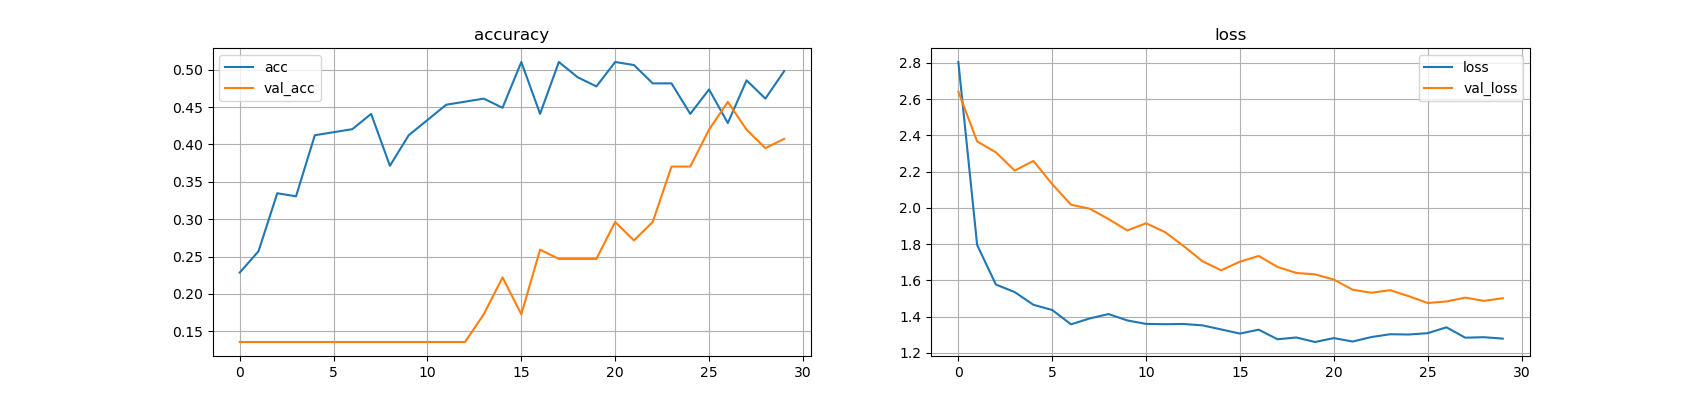

As shown above, it decreased the accuracy (best at val is **46%**) and slowed network to be plateaus (around **25th** epoch).

### PART C - COST FUNCTION (10 POINTS)  On your Deep Learning model. 
Change cost function from **categorical crossentropy** to **KL divergence**.

In [ ]:
def buildCNN2():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu',
                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='kl_divergence', metrics=['accuracy'])

    model.summary()
    return model

In [ ]:
model2 = buildCNN2()
history2 = model2.fit(train, epochs=30, validation_data=test)
plotData(history2)

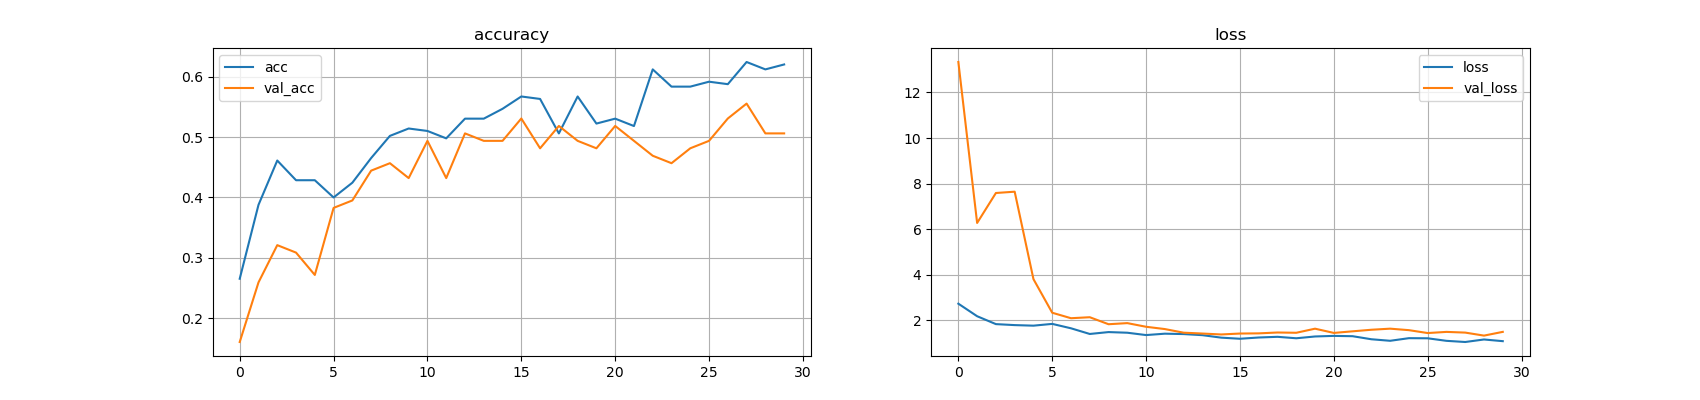

As shown above, it slightly decreased the accuracy (best at val is **55%**) and didn't affect network plateaus (also around **15th** epoch).

### PART D - EPOCHS (10 POINTS)
Change the number of epochs initialization from **30** to **50**.

In [ ]:
model = buildCNN()
history3 = model.fit(train, epochs=50, validation_data=test)
plotData(history3)

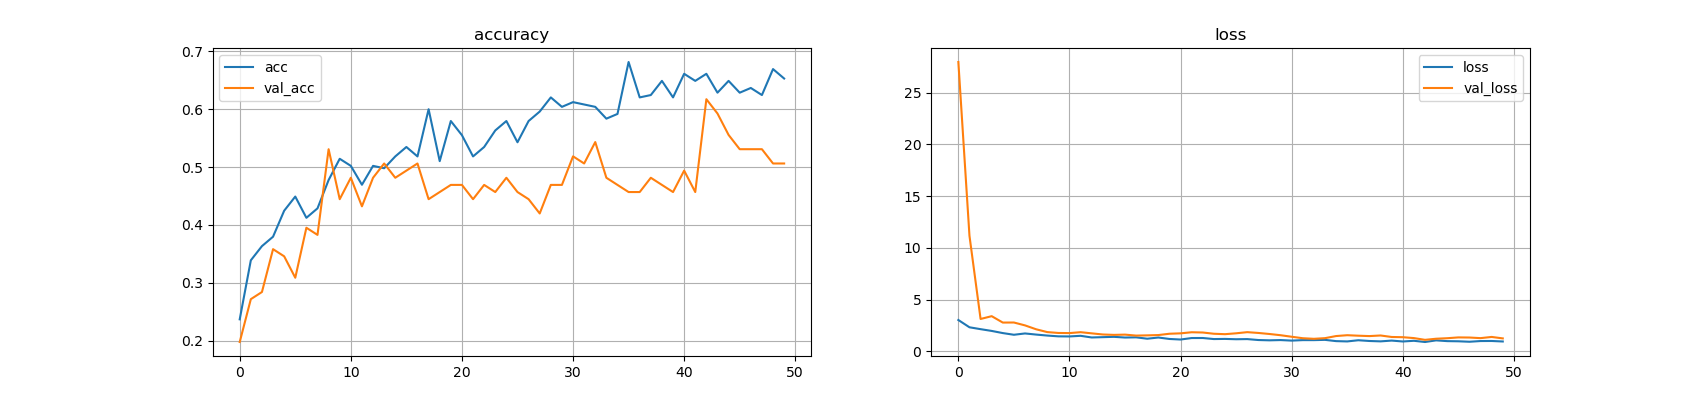

As shown above, it slightly increased the accuracy (best at val is **62%**) and didn't affect network plateaus (also around **15th** epoch).

### PART E - GRADIENT ESTIMATION (10 POINTS)
Change gradient estimation from **Adam** to **RMSprop**.

In [ ]:
def buildCNN4():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu',
                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()
    return model

In [ ]:
model4 = buildCNN4()
history4 = model4.fit(train, epochs=30, validation_data=test)
plotData(history4)

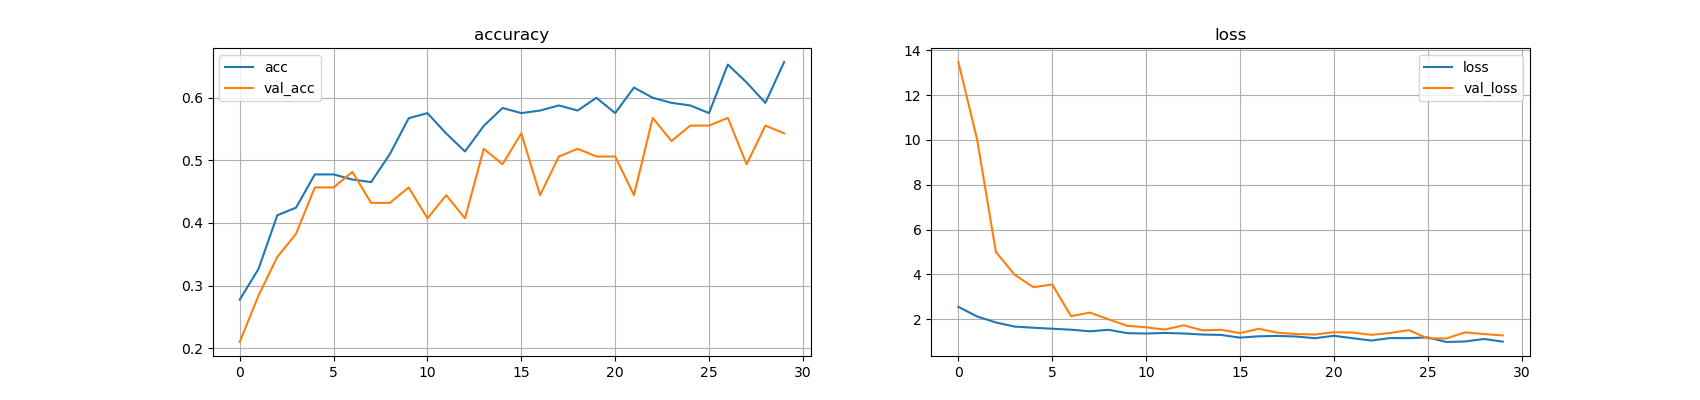

As shown above, it slightly decreased the accuracy (best at val is **56%**) and didn't affect network plateaus (also around **15th** epoch).

### PART F - NETWORK ARCHITECTURE (10 POINTS)
Change network architecture by decreasing **3** convolution layers to **2** convolution layers.

In [ ]:
def buildCNN5():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(IMAGE_WIDTH,
                                                                                     IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()
    return model

In [ ]:
model5 = buildCNN5()
history5 = model5.fit(train, epochs=30, validation_data=test)
plotData(history5)

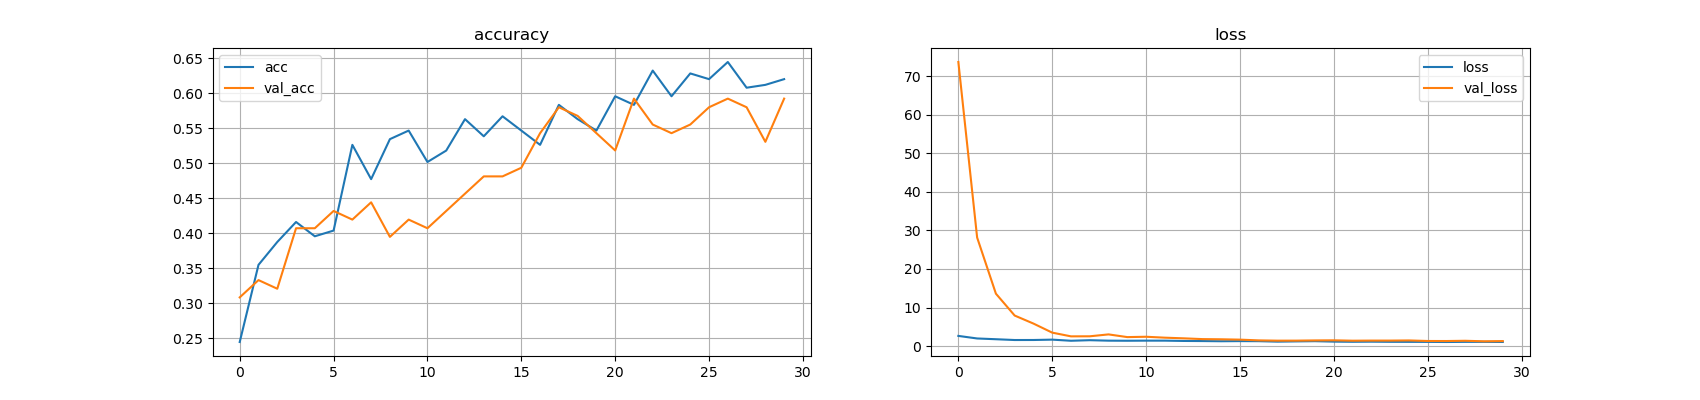

As shown above, it slightly decreased the accuracy (best at val is **59%**) and slightly slowed network to be plateaus (also around **17th** epoch).

### PART G - NETWORK INITIALIZATION (10 POINTS)
Change the network initialization to be **He Normal** initialization.


In [ ]:
def buildCNN6():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Conv2D(filters=32, kernel_size=(2, 2), kernel_initializer = 'he_normal', activation='relu',
                     input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(2, 2), kernel_initializer = 'he_normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(2, 2), kernel_initializer = 'he_normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()
    return model

In [ ]:
model6 = buildCNN6()
history6 = model6.fit(train, epochs=30, validation_data=test)
plotData(history6)

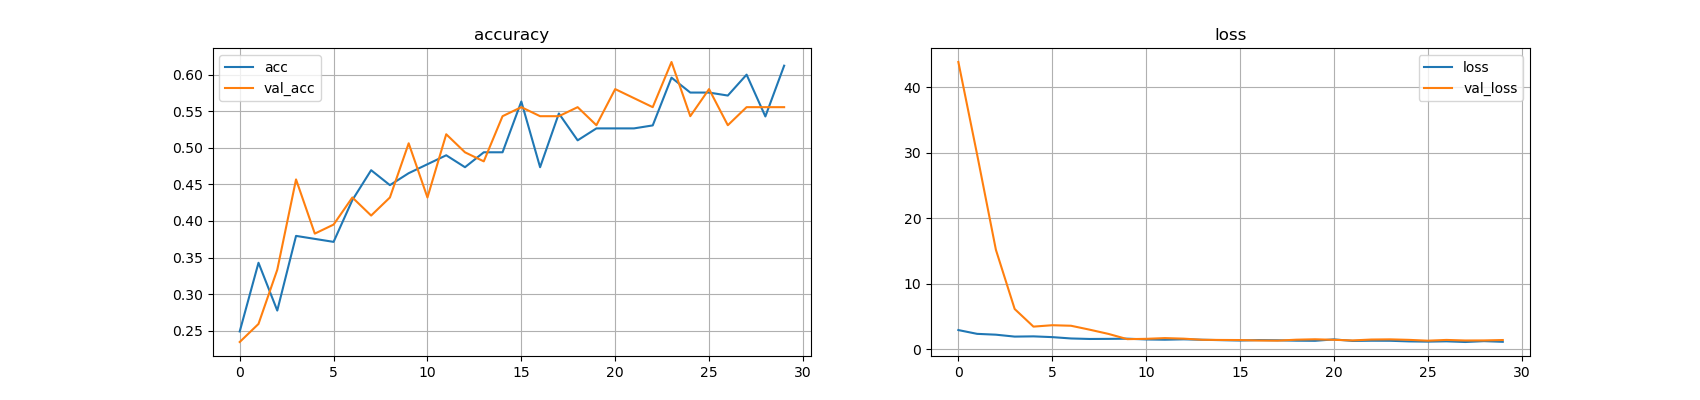

As shown above, it slightly increased the accuracy (best at val is **62%**) and didn't affect network plateaus (also around **15th** epoch).

### Reference

[1] https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters<br>
[2] https://www.youtube.com/watch?v=pSexXMdruFM<br>
[3] https://www.youtube.com/watch?v=ycxulUVoNbk<br>
[4] https://youtu.be/AjtX1N_VT9E<br>
[5] https://youtu.be/C_zFhWdM4ic<br>
[6] https://www.kaggle.com/datasets/kvpratama/pokemon-images-dataset?resource=download

### License

Released under MIT License

Copyright (c) 2022 Junyang Luo.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.